# Multiple Regression Dataset=Concreate compressive strength prediction dataset

In [107]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")

In [78]:
#Load the dataset
df=pd.read_csv("concrete_strength_prediction_dataset.csv")

# Data defination

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

ariable Information:

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [79]:
#EDA (Head)
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Concluion=The data is loaded properly and there is mo modification needed in terms of name of col and data structure.

The target col is concrete compressive strength

In [80]:
#EDA (Tail)
df.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [81]:
#EDA (Shape)
df.shape

(1030, 9)

Conclusion=There are 9 cols and 1030 rows.

In [82]:
#EDA (Size)
df.size

9270

Conclusion=There are 9270 data pts.

In [83]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Conclusion=There is no need of change of dtype because the data matches with the dtype and there are no null values.

In [84]:
#EDA (Corr)
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Cunclusion=The target col concrete compressive stenghth is having max corr with cement lowest with fine aggregate.

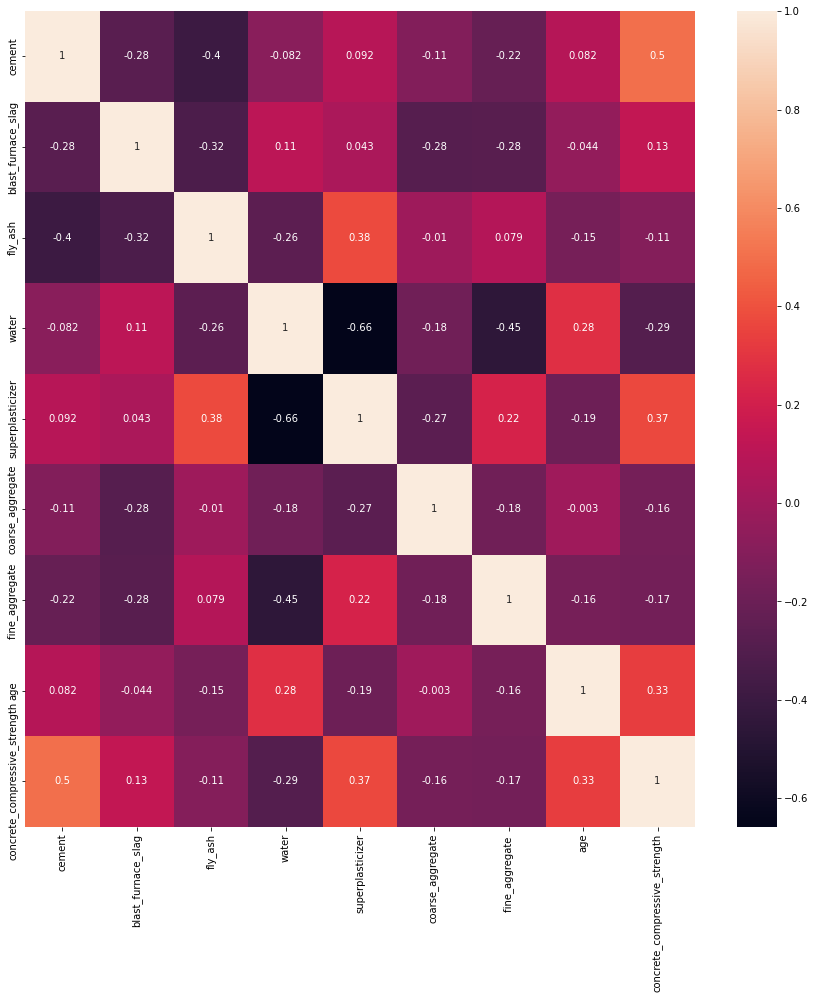

In [85]:
#Data visulization (Heat map of corr)
sns.heatmap(df.corr(),annot=True);

In [105]:
#VIF
VIF=pd.Series([variance_inflation_factor(df.values,i) for i in range(df.shape[1])],index=df.columns)
VIF

cement                           30.717182
blast_furnace_slag                4.935274
fly_ash                           4.794294
water                            96.949208
superplasticizer                  5.849273
coarse_aggregate                 86.028568
fine_aggregate                   73.411201
age                               4.561451
concrete_compressive_strength    20.658483
dtype: float64

Conclusion=There is multicolinerity present and treatment of that is to be done.We can do so by using Lasso or ridge regression.

In [87]:
#EDA (Descibe)
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Conclusion=If the median is greater or less than mean it means that there is skewness in the col.

In [129]:
#EDA (Check of duplicate values)
df[df.duplicated()]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7.0,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7.0,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28.0,60.29


Concluion=There are duplicate values present and we need to treat them.

In [130]:
#Treatment of duplicate values
df=df.drop_duplicates()

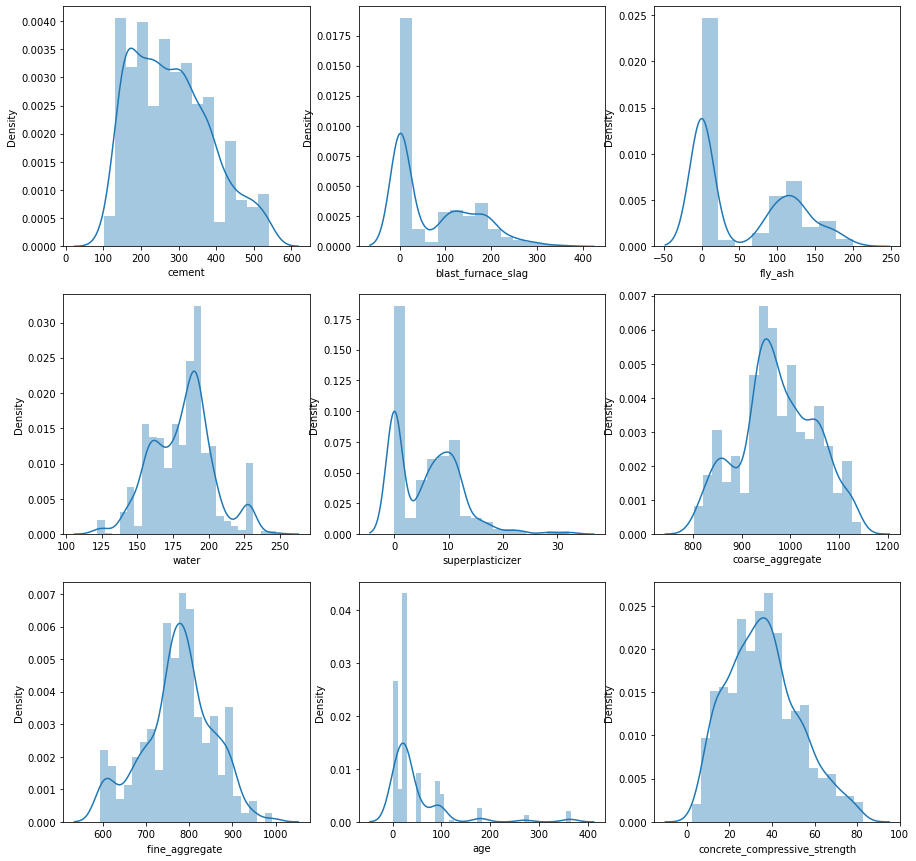

In [88]:
#Data visulization
df_col=df.columns
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=[15,15])
for col, sub in zip(df_col,ax.flatten()):
    sns.distplot(df[col],ax=sub);

Concluion=The target col concreate_compressive_strenght seems to be normally distributed.

age and blast furnace slag cols seems to be right skewed.

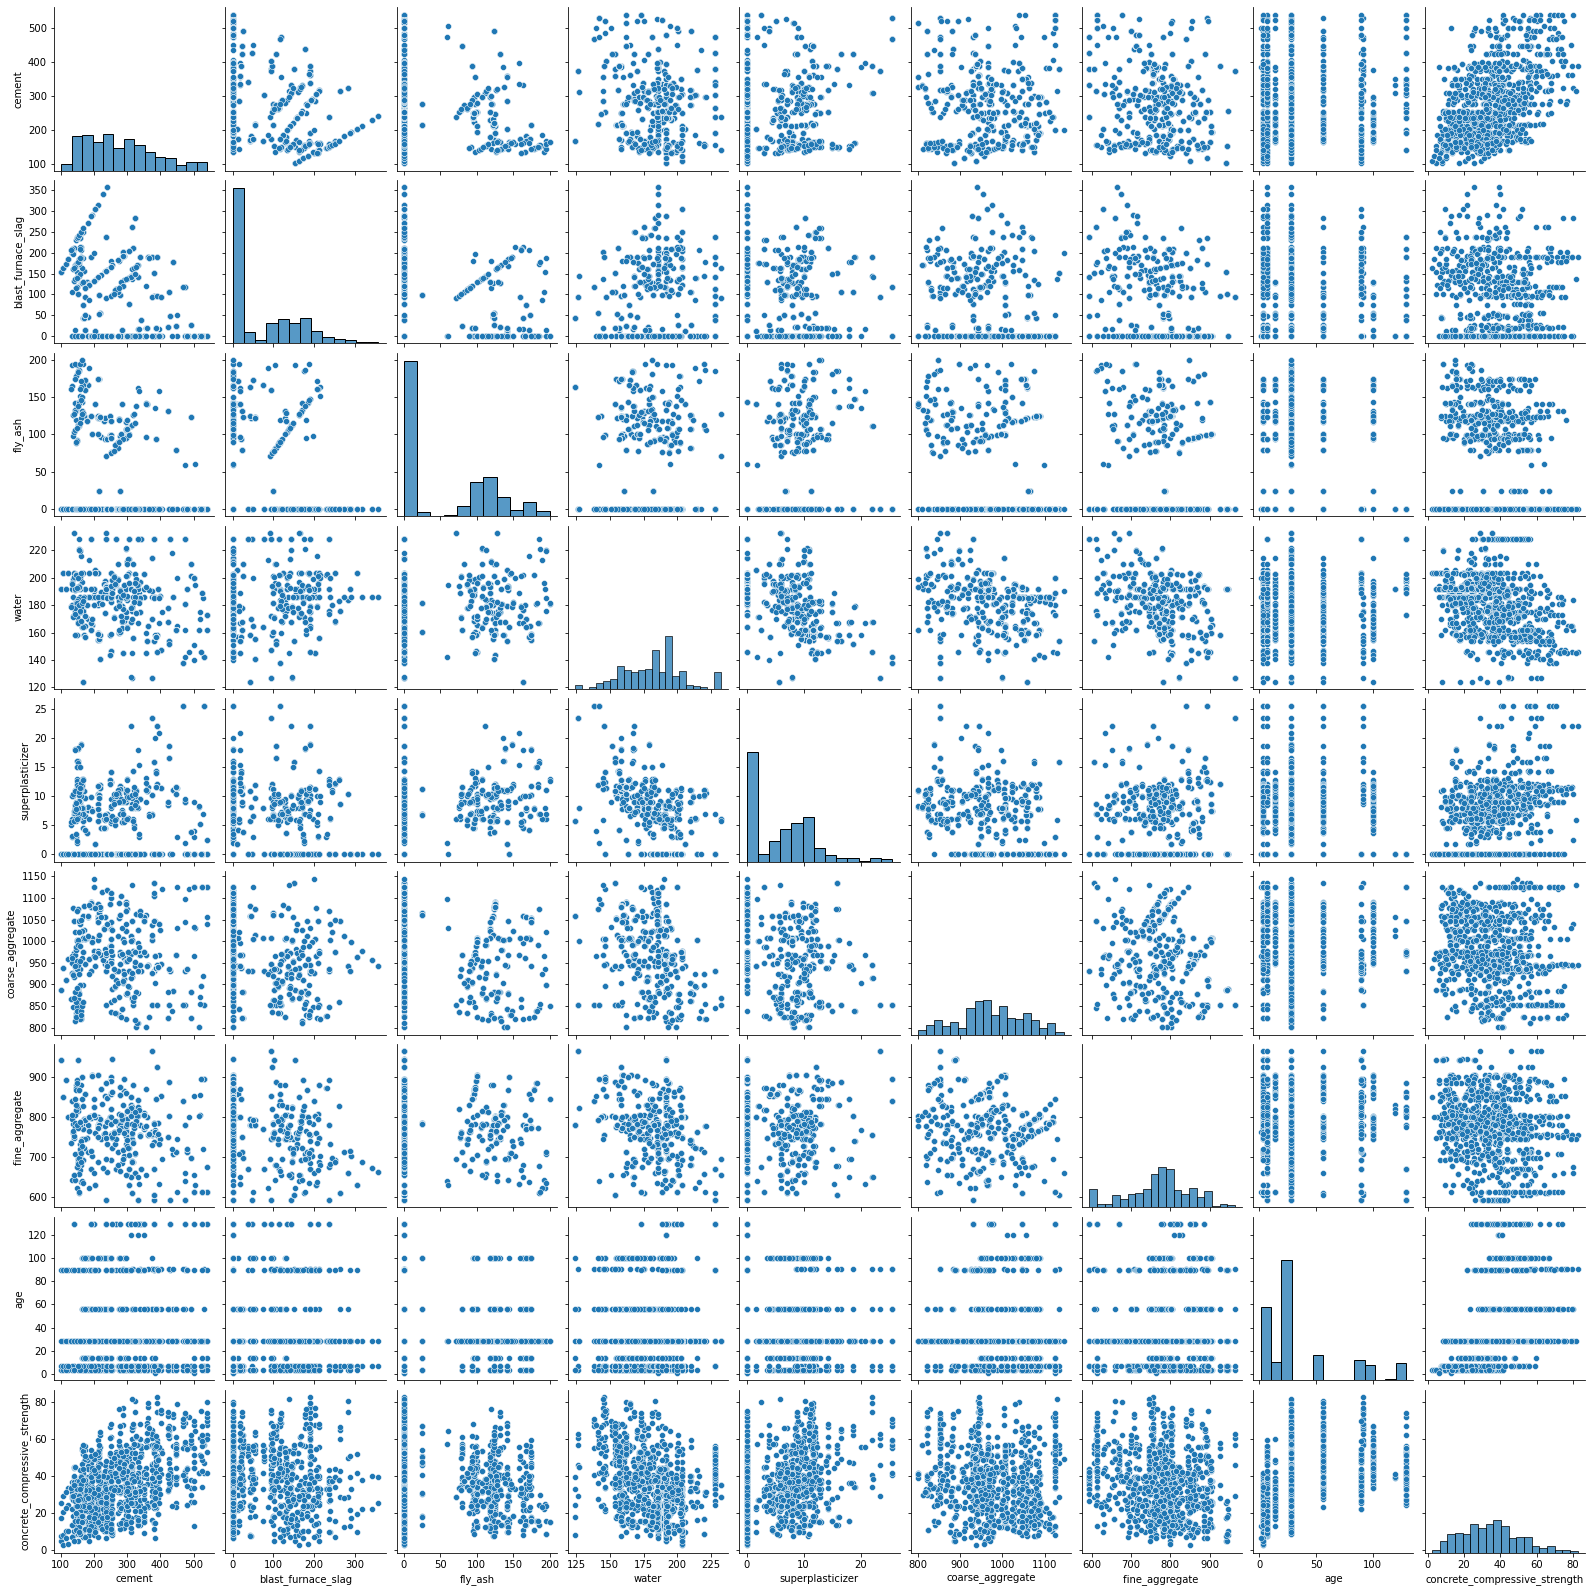

In [132]:
#Data visulization (Pair plot)
sns.pairplot(data=df);

In [90]:
#Missing values
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

Concluion=There are no missing values in the dataset.

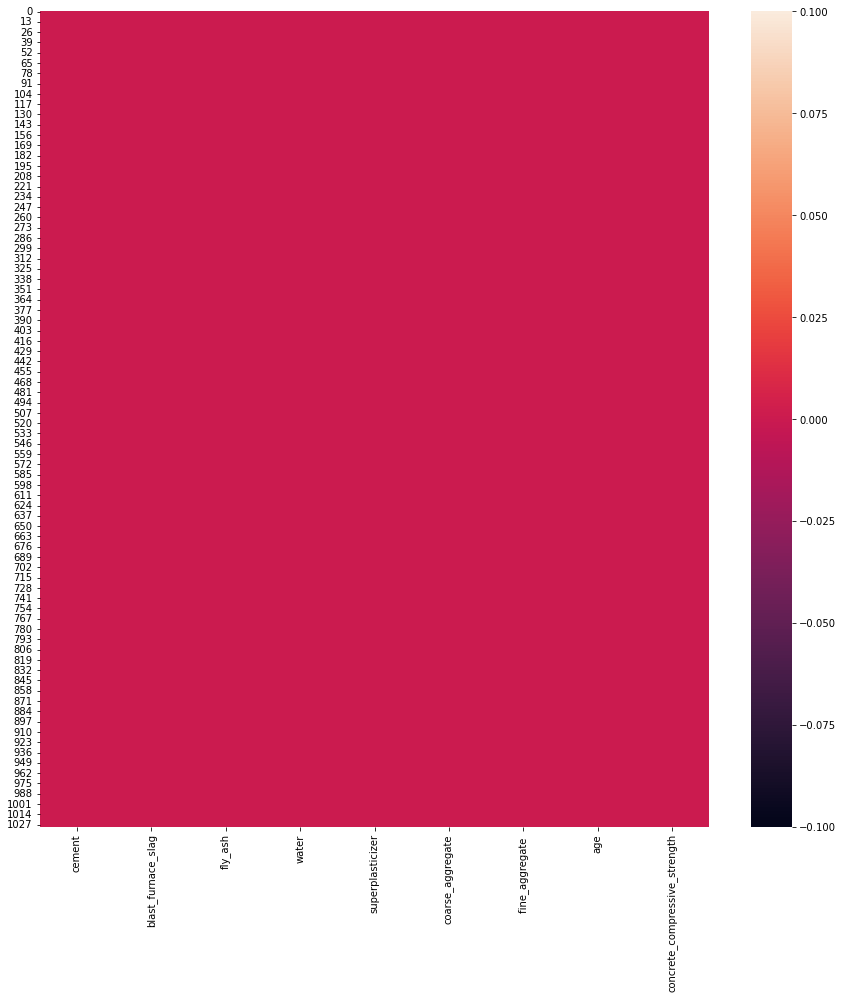

In [91]:
#Data visulization of missing values
sns.heatmap(df.isnull());

Concluion=There are no missing values.

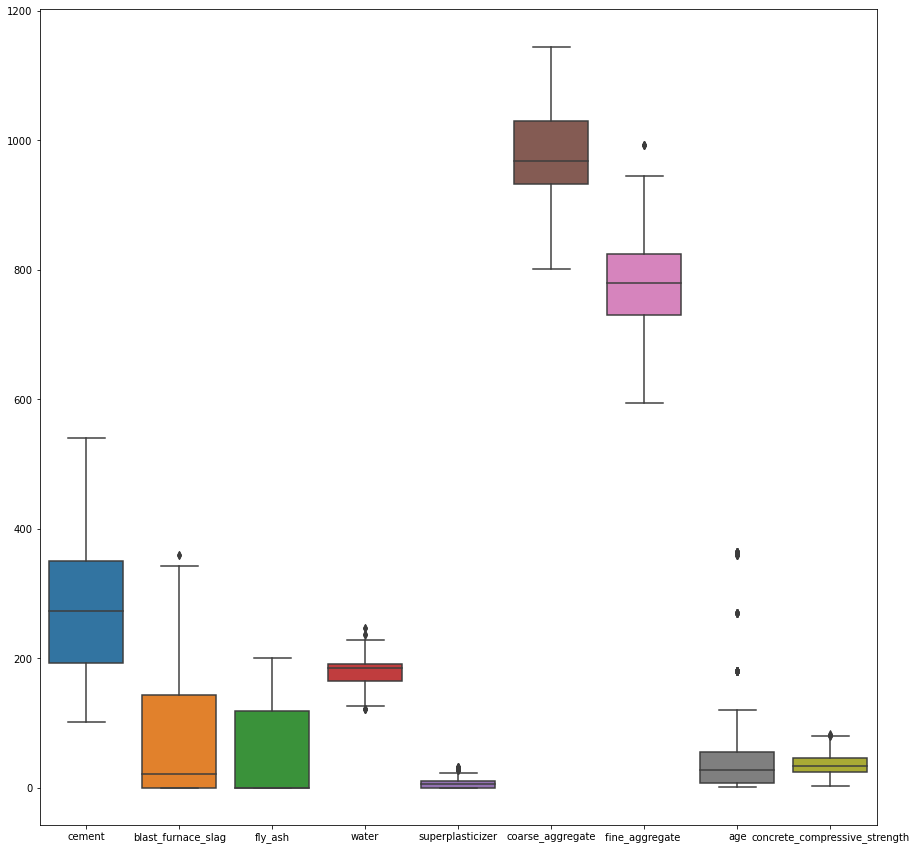

In [92]:
#Outliers detection
plt.rcParams["figure.figsize"]=[15,15]
sns.boxplot(data=df);

Conclusion=There are outliers in blast_furnance_slag,superplasticizer,age,fine aggregate and water.

In [93]:
#Tretment of outlier blast_furnace_slad
q1=df["blast_furnace_slag"].quantile(0.25)
q3=df["blast_furnace_slag"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["blast_furnace_slag"]=np.where(df["blast_furnace_slag"]>mx,mx,df["blast_furnace_slag"])

In [94]:
#Tretment of outlier superplasticizer
q1=df["superplasticizer"].quantile(0.25)
q3=df["superplasticizer"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["superplasticizer"]=np.where(df["superplasticizer"]>mx,mx,df["superplasticizer"])

In [95]:
#Tretment of outlier age
q1=df["age"].quantile(0.25)
q3=df["age"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["age"]=np.where(df["age"]>mx,mx,df["age"])

In [96]:
#Tretment of outlier fine aggregare
q1=df["fine_aggregate "].quantile(0.25)
q3=df["fine_aggregate "].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["fine_aggregate "]=np.where(df["fine_aggregate "]>mx,mx,df["fine_aggregate "])

In [97]:
#Tretment of outlier water
q1=df["water"].quantile(0.25)
q3=df["water"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["water"]=np.where(df["water"]>mx,mx,df["water"])
df["water"]=np.where(df["water"]<mn,mn,df["water"])

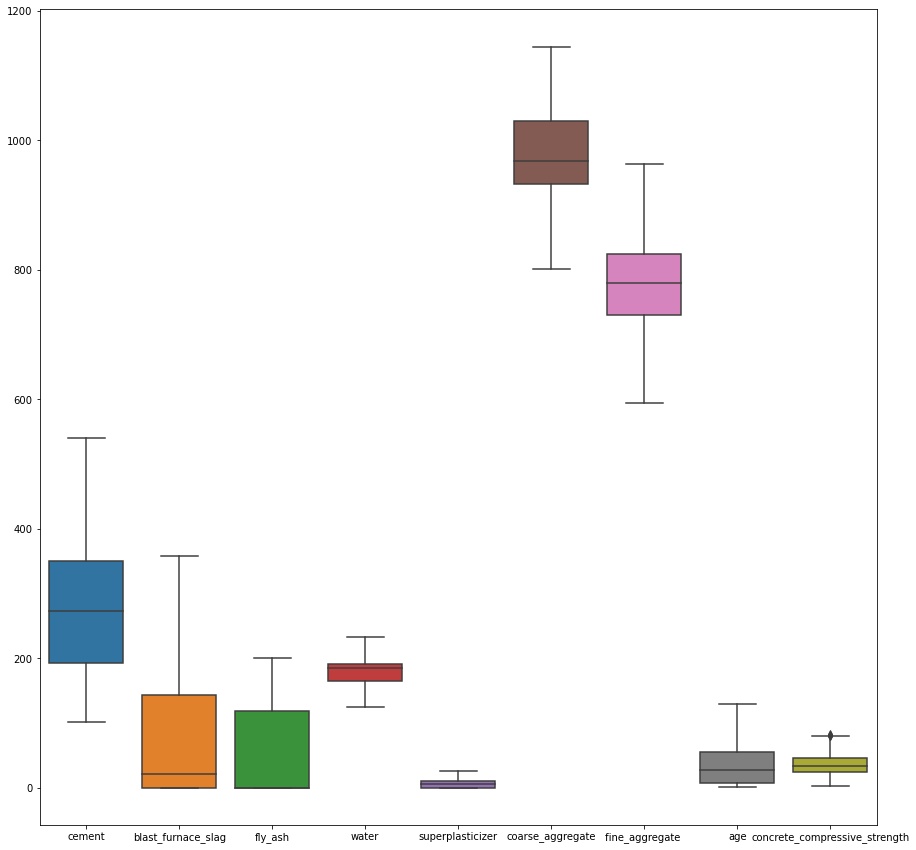

In [98]:
#Outliers check
plt.rcParams["figure.figsize"]=[15,15]
sns.boxplot(data=df);

Conlusion=The outliers have gone.

In [99]:
#Data standardization
X=df.drop("concrete_compressive_strength",axis=1)
y=df["concrete_compressive_strength"]
ss=StandardScaler()
scaledX=ss.fit_transform(X)

In [100]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(scaledX,y,train_size=0.7,random_state=42)

In [101]:
#Model instantination
model=LinearRegression()

In [102]:
#Fit
model.fit(X_train,y_train)

LinearRegression()

In [103]:
#Score of training and testing
print("Training score is",model.score(X_train,y_train))
print("Testing score is",model.score(X_test,y_test))

Training score is 0.7328433288174342
Testing score is 0.7120451336817546


Conclusion=The condition is called as good fit because the training score and testing score is good and optimization is not required.

# Thank you